In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv('Datasets/digit_train.csv')
test_df = pd.read_csv('Datasets/digit_test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <center> **Data Preprocessing** </center>

In [5]:
train = np.array(train_df)
test = np.array(test_df) # test has no label

In [6]:
train_x = train[:,1:]
train_y = train[:,0]

In [7]:
print(train_x.shape)
print(train_y.shape)

(42000, 784)
(42000,)


In [8]:
train_y = np.expand_dims(train_y, 1)

In [9]:
train_x = train_x / 255
test = test / 255

In [10]:
def showImage(img, label = None):
    plt.figure(figsize=(3,3))
    if label:
        plt.title(f"Predicted Number is : {label}" )
    plt.imshow(img)

# <center> **Neural Network** </center>

In [11]:
%run neural_network.ipynb

In [12]:
number_of_features = train_x.shape[1]
number_of_outputs = len(train_df['label'].unique())

nn = NeuralNetwork(number_of_features, number_of_outputs, loss_function=CrossEntropyLoss(), output_activation_function=SoftmaxActivation())

nn.addHiddenLayer(Layer(5, activation_function=ReLUActivation()))
nn.addHiddenLayer(Layer(5, activation_function=SigmoidActivation()))

In [13]:
nn.fit(train_x, train_y, learning_rate=0.05, epochs=5)

Epoch 1, oveservation 42000 : loss = 1.0285207553409037
Epoch 2, oveservation 42000 : loss = 1.0291389597108573
Epoch 3, oveservation 42000 : loss = 1.0293133837213766
Epoch 4, oveservation 42000 : loss = 1.0297695782691982
Epoch 5, oveservation 42000 : loss = 1.0291041438184567


In [14]:
prob = nn.predict(test)

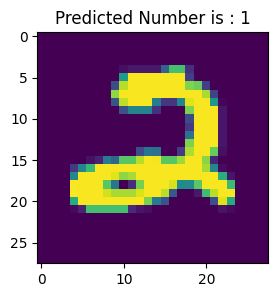

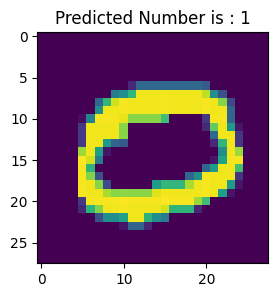

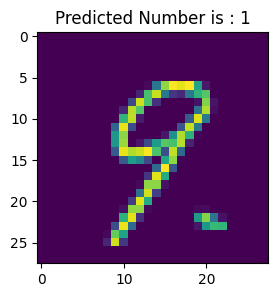

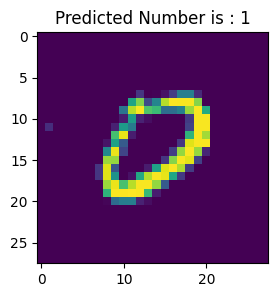

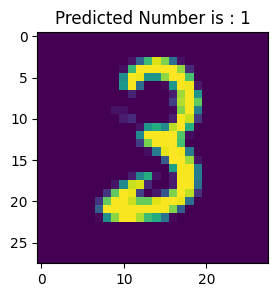

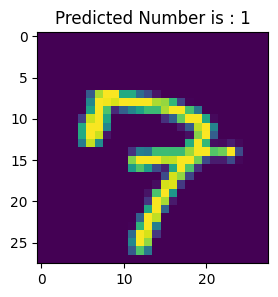

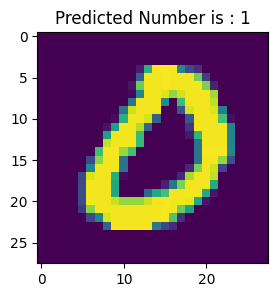

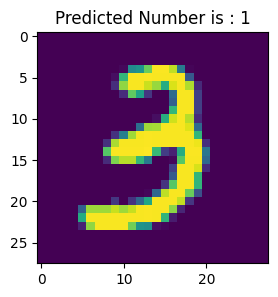

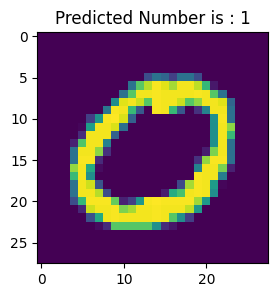

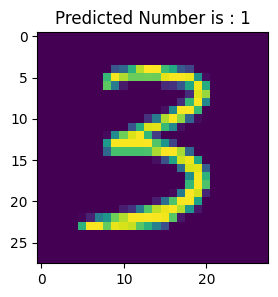

In [15]:
l = len(prob)
for i in range(10):
    pred = np.argmax(prob[i])
    img = np.reshape(test[i], (28, 28))
    showImage(img, label=pred)